In [ ]:
import tensorflow as tf
import keras
from tensorflow import keras
from keras.layers import Dense # dence refers it is fully connected neural network, here all leayer ar connected each other 
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
data=keras.datasets.mnist.load_data() # load the dataset 
data

In [ ]:
(xtrain,ytrain),(xtest,ytest)=keras.datasets.mnist.load_data() # load the data set

In [ ]:
xtrain.ndim

In [ ]:
xtrain.shape # 

In [ ]:
xtrain[0] # show the pixel value of an image 

In [ ]:
ytrain.shape

In [ ]:
ytrain[8]

In [ ]:
ytrain.ndim

In [ ]:
xtest.shape

In [ ]:
xtest[0]

In [ ]:
ytest.shape

In [ ]:
xtest[1] # show the pixel value of an image 

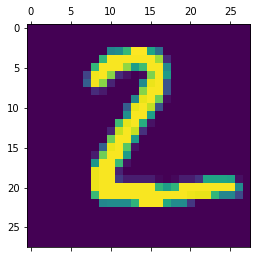

In [31]:
plt.matshow(xtest[1]) # Showing an image of index in 

In [35]:
ytest[1] # showing the image value of index one 

2

In [39]:
ytrain[10] # showing an image value

3

<Figure size 720x576 with 0 Axes>

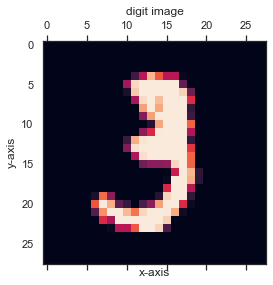

In [42]:
sns.set(style='white')
plt.figure(figsize=(10,8))
plt.matshow(xtrain[10]) # showing an image
plt.title('digit image')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

# Normalizatin

In [43]:
xtest=xtest/255 # dividing all xtext data by 255
xtrain=xtrain/255

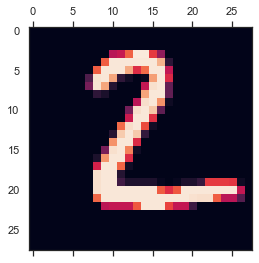

In [45]:
plt.matshow(xtest[1]) # after dividing 

# Flatten the image
flatten the image/reshape into 28*28 to 784

(784,)

In [47]:
xtrain=xtrain.reshape(-1,784) # converting 2D to 1D
xtest=xtest.reshape(-1,784)

In [50]:
xtrain[0].shape

(784,)

In [51]:
xtrain[0].ndim

1

# Build the Model

| Note:

Duing sequential model

doing 3 layers(input, hiden nad output layer), 

number of neuron 64 in first 2 layers  and using relu function

number of neuron 64 in output layer and using softmax function

In [52]:
model=keras.Sequential() # loding the model

In [ ]:
# using add() to add individul layer
model.add(Dense(64,activation='relu',input_dim=784)) #input_dim which using to define the dimention of the image